<a href="https://colab.research.google.com/github/SilviaMaharjan/Sem3PythonWorkshops/blob/main/Silvia_Maharjan_2408228_ws4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem - 1: Perform a classification task with knn from scratch.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset:
diabetes_df = pd.read_csv('/content/drive/MyDrive/year2/diabetes.csv')
diabetes_df.head() #displays first few rows
diabetes_df.info() #displays data type
print("Missing data: \n",diabetes_df.isnull().sum()) #checks for null values in anywhere
diabetes_df.describe() #gives mathematical description

# 2. Handle Missing Data:
# NOMISSINGDATA

# 3. Feature Engineering:
# Separate feature matrix (X) and target variable (y)
X = diabetes_df.drop(columns=['Outcome'])  # Feature matrix
y = diabetes_df['Outcome']                # Target variable

# Train-Test Split (70% Train - 30% Test)
def train_test_split_manual(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    n = X.shape[0]
    indices = np.arange(n)
    np.random.shuffle(indices)

    split_idx = int(n * (1 - test_size))  # Index to split train and test data
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]

    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_manual(X, y)

# 4. implement KNN:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


# KNN Class
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict_single(self, x_query):
        # Compute Euclidean distances
        distances = [np.sqrt(np.sum((x_query - x_train)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):
        return [self.predict_single(x) for x in np.array(X)]

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        return np.sum(y_true == y_pred) / len(y_true)


# initialize KNN with k=3
knn = KNN(k=3)

# train the model
knn.fit(X_train, y_train)

# predict and evaluate
accuracy = knn.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.2f}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Missing data: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age           

In [ ]:
# Problem - 2 - Experimentation:
# 1. Repeat the Classification Task:

from sklearn.preprocessing import MinMaxScaler
import time

# 1. Scale the Feature Matrix using Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Re-split the scaled data into train-test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_manual(pd.DataFrame(X_scaled), y)

# Initialize KNN for Scaled Data
knn_scaled = KNN(k=3)

# Train and Evaluate on Scaled Data
knn_scaled.fit(X_train_scaled, y_train_scaled)
scaled_accuracy = knn_scaled.evaluate(X_test_scaled, y_test_scaled)

# Display Results
print(f"Accuracy on original data: {accuracy:.2f}")
print(f"Accuracy on scaled data: {scaled_accuracy:.2f}")

Accuracy on original data: 0.70
Accuracy on scaled data: 0.72


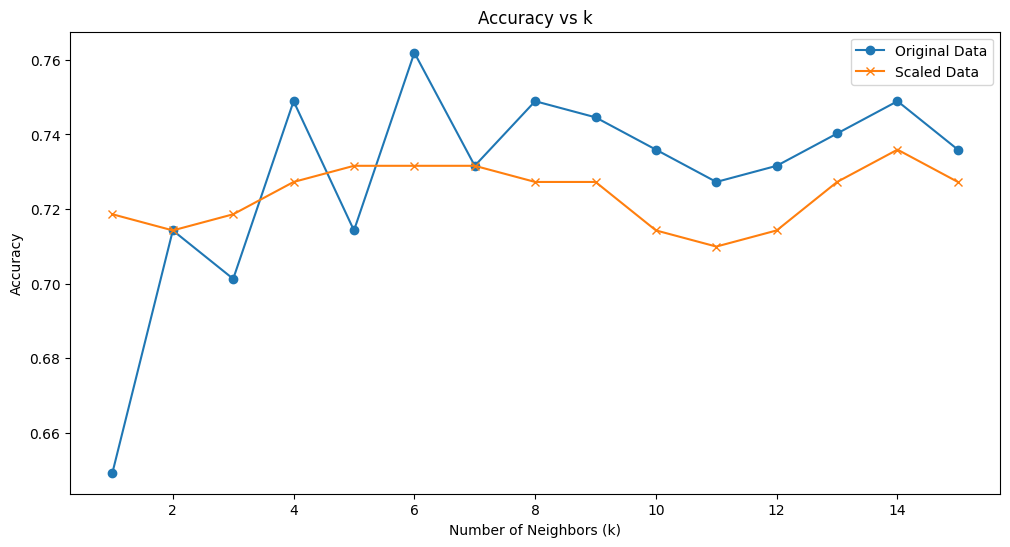

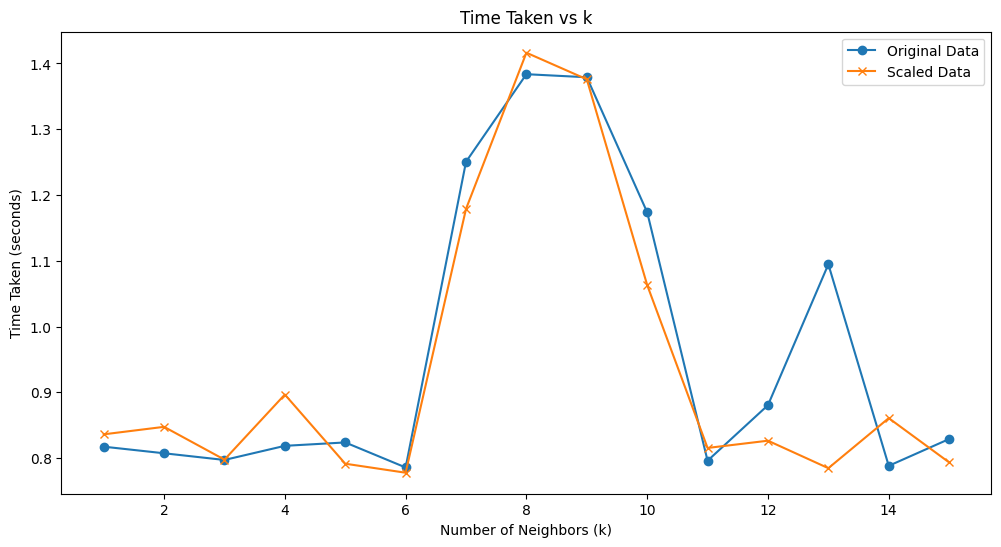

In [ ]:
# Problem - 3 - Experimentation with k:
import time
import matplotlib.pyplot as plt

def experiment_with_k(X_train, X_test, y_train, y_test, k_values):
    accuracies = []
    times = []

    for k in k_values:
        knn = KNN(k=k)
        start_time = time.time()

        knn.fit(X_train, y_train)
        acc = knn.evaluate(X_test, y_test)

        end_time = time.time()

        accuracies.append(acc)
        times.append(end_time - start_time)

    return accuracies, times

# Range of k
k_values = range(1, 16)

# Experiment on Original Data
orig_accuracies, orig_times = experiment_with_k(X_train, X_test, y_train, y_test, k_values)

# Experiment on Scaled Data
scaled_accuracies, scaled_times = experiment_with_k(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, k_values)

# Plot Accuracy vs k
plt.figure(figsize=(12, 6))
plt.plot(k_values, orig_accuracies, label='Original Data', marker='o')
plt.plot(k_values, scaled_accuracies, label='Scaled Data', marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.legend()
plt.show()

# Plot Time Taken vs k
plt.figure(figsize=(12, 6))
plt.plot(k_values, orig_times, label='Original Data', marker='o')
plt.plot(k_values, scaled_times, label='Scaled Data', marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken vs k')
plt.legend()
plt.show()